In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("год_новый.csv", sep=';', encoding='windows-1251')

# используем параметр head(), что бы посмотреть первые 5 строк наших данных.
df.head()

,наименование услуги,годовая прибыль,год
0,солярий,1000,2020
1,фитнес,646100,2020
2,тренажерный зал,640200,2020
3,солярий,2000,2021
4,фитнес,961200,2021


In [10]:
data = pd.crosstab(index=df['наименование услуги'],
                    columns=df['год'], 
                    values=df['годовая прибыль'], 
                    aggfunc='sum').reset_index()
data

год,наименование услуги,2020,2021,2022
0,хоккей (продажа билетов),1263800,1842100,1639500
1,заточка коньков,128500,185200,161500
2,массовое катание,1102700,1643000,1429400
3,прокат коньков,731200,1081600,930100
4,реклама,603700,876900,789200
5,солярий,1000,2000,1000
6,тренажерный зал,640200,950200,807600
7,фитнес,646100,961200,855400


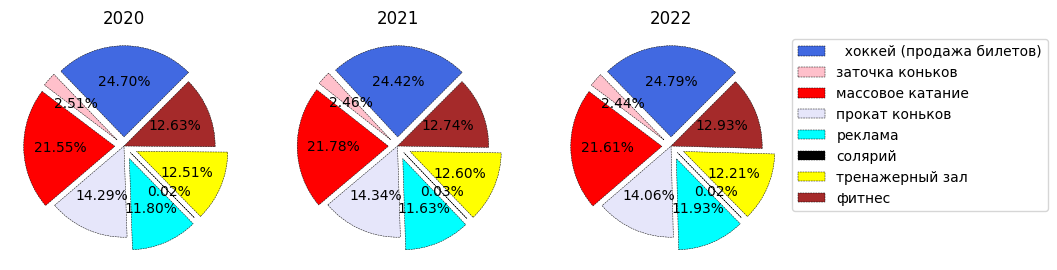

In [20]:
# зададим цвета и параметры разнесения диаграммы для лучшей визуализации данных. 
explode = (0.1, 0.1, 0.1, 0.0, 0.15, 0.1, 0.15, 0.0)
colors = ['royalblue', 'pink', 'red', 'lavender', 'aqua', 'black', 'yellow', 'brown']

# создадим круговые диаграммы, указав размер и их количество на одной строке.
fig, ax = plt.subplots(figsize=(10, 10), nrows= 1 , ncols= 3)

# что бы построить и вывести диаграммы с нужными данными, воспользуемся методом pie().
# для показа процента фрагментов используем autopct.
# чтобы изменить свойства клиньев, воспользуемся аргументом wedgeprops и изменим стиль линий клиньев.
# а параметр startangle используем, для изменения угла диаграммы (по умолчанию угол равен 0).
ax[0].pie(data[2020], autopct='%1.2f%%',  explode=explode, 
            wedgeprops={'lw':0.35, 'ls':'--','edgecolor':"k"}, 
            colors=colors, startangle=45)

ax[1].pie(data[2021], autopct='%1.2f%%',  explode=explode, 
            wedgeprops={'lw':0.35, 'ls':'--','edgecolor':"k"}, 
            colors=colors, startangle=45)

ax[2].pie(data[2022], autopct='%1.2f%%',  explode=explode, 
            wedgeprops={'lw':0.35, 'ls':'--','edgecolor':"k"}, 
            colors=colors, startangle=45) 

# чтобы добавить заголовок к каждой круговой диаграмме, используем функцию title()
ax[0].set_title('2020')
ax[1].set_title('2021')
ax[2].set_title('2022')

# добавляем одну легенду на все диаграммы, используя функцию Legend() и передадим параметры 
# loc и bbox_to_anchor методу легенды, чтобы установить местоположение и положение легенд вручную.
plt.legend(labels=data['наименование услуги'], bbox_to_anchor=(1,1), loc="upper left")

# покажем полученный результат используя show()
plt.show()